# Subselecting concrete and abstract nouns

We now have a list of concrete-abstract word pairs generated using LexOPS (Taylor et al., 2020) and stored as `stim_long_brysbaert_all_possible_seed42.csv`. This notebook does the following:
- visualise the psycholinguistic properties
- subselect the word pairs
    - choose only nouns
    - word length < 8


In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import date

dir = 'U:\ownCloud\projects\FakeDiamond\stimuli'

## Visualise psycholinguistic properties of concrete-abstract word pairs 

Read in all ratings from Brysbaert et al. (2014)

In [2]:
# ratings_all = pd.read_csv(os.path.join(dir, 'glasgow_norms_column_renamed.csv'))
ratings_all = pd.read_csv(os.path.join(dir, 'resources', 'brysbaert_etal_2014.csv'))
ratings_all.rename(columns={'Word': 'word'}, inplace=True)
ratings_all.set_index('word', inplace=True)
ratings_all

,Bigram,Conc_M,Conc_SD,Unknown,Total,Percent_known,SUBTLEX,Dom_Pos
word,,,,,,,,
roadsweeper,0,4.85,0.37,1,27,0.96,0,0
traindriver,0,4.54,0.71,3,29,0.90,0,0
tush,0,4.45,1.01,3,25,0.88,66,0
hairdress,0,3.93,1.28,0,29,1.00,1,0
pharmaceutics,0,3.77,1.41,4,26,0.85,0,0
...,...,...,...,...,...,...,...,...
unenvied,0,1.21,0.62,1,30,0.97,0,NaN
agnostically,0,1.20,0.50,2,27,0.93,0,NaN
conceptualistic,0,1.18,0.50,4,26,0.85,0,NaN


Read in concrete-abstract word pairs

In [3]:
stim_long = pd.read_csv(os.path.join(dir, 'stim_long_brysbaert_all_possible_seed42.csv'))
stim_long = stim_long.rename(columns={'string': 'word'})
stim_long = stim_long.applymap(lambda s: s.lower() if type(s) == str else s)
stim_long

,item_nr,condition,match_null,word,Zipf.SUBTLEX_UK,PoS.SUBTLEX_UK,Length,AoA.Kuperman,CNC.Brysbaert
0,1,abstract,a1,superb,4.383176,adjective,6,10.00,1.62
1,1,concrete,a1,marine,4.196932,adjective,6,9.80,4.25
2,2,abstract,a1,coefficient,1.951008,noun,11,13.42,1.85
3,2,concrete,a1,gingivitis,1.774917,noun,10,12.33,4.03
4,3,abstract,a2,unkindness,1.809679,noun,10,7.68,1.96
...,...,...,...,...,...,...,...,...,...
5285,2643,concrete,a1,fingerprint,3.210283,noun,11,7.56,4.96
5286,2644,abstract,a1,liberation,3.507311,noun,10,13.45,2.21
5287,2644,concrete,a1,fragment,3.272077,noun,8,11.53,4.10
5288,2645,abstract,a2,lose,5.112576,verb,4,5.78,2.25


Implement Excel's VLOOKUP function to find concreteness rating SD from Brysbaert et al.'s norms

In [4]:
stim_long['CNC_SD'] = ''
stim_long.set_index('word', inplace=True)
stim_long['CNC_SD'] = stim_long.index.map(ratings_all['Conc_SD'])
stim_long.rename(columns={'CNC.Brysbaert': 'CNC_M', 
                          'Zipf.SUBTLEX_UK': 'Zipf',
                          'PoS.SUBTLEX_UK': 'PoS',
                          'AoA.Kuperman': 'AoA'}, inplace=True)
stim_long.reset_index(inplace=True)
stim_long.drop(labels=['match_null'], axis=1, inplace=True)
stim_long

,word,item_nr,condition,Zipf,PoS,Length,AoA,CNC_M,CNC_SD
0,superb,1,abstract,4.383176,adjective,6,10.00,1.62,1.05
1,marine,1,concrete,4.196932,adjective,6,9.80,4.25,1.11
2,coefficient,2,abstract,1.951008,noun,11,13.42,1.85,1.08
3,gingivitis,2,concrete,1.774917,noun,10,12.33,4.03,1.25
4,unkindness,3,abstract,1.809679,noun,10,7.68,1.96,1.34
...,...,...,...,...,...,...,...,...,...
5285,fingerprint,2643,concrete,3.210283,noun,11,7.56,4.96,0.20
5286,liberation,2644,abstract,3.507311,noun,10,13.45,2.21,1.35
5287,fragment,2644,concrete,3.272077,noun,8,11.53,4.10,1.01
5288,lose,2645,abstract,5.112576,verb,4,5.78,2.25,1.35


Plot distributions of concreteness mean and SD of matched stimuli

Text(0.5, 0.98, 'Psycholinguistic properties of 2645 concrete-abstract word pairs')

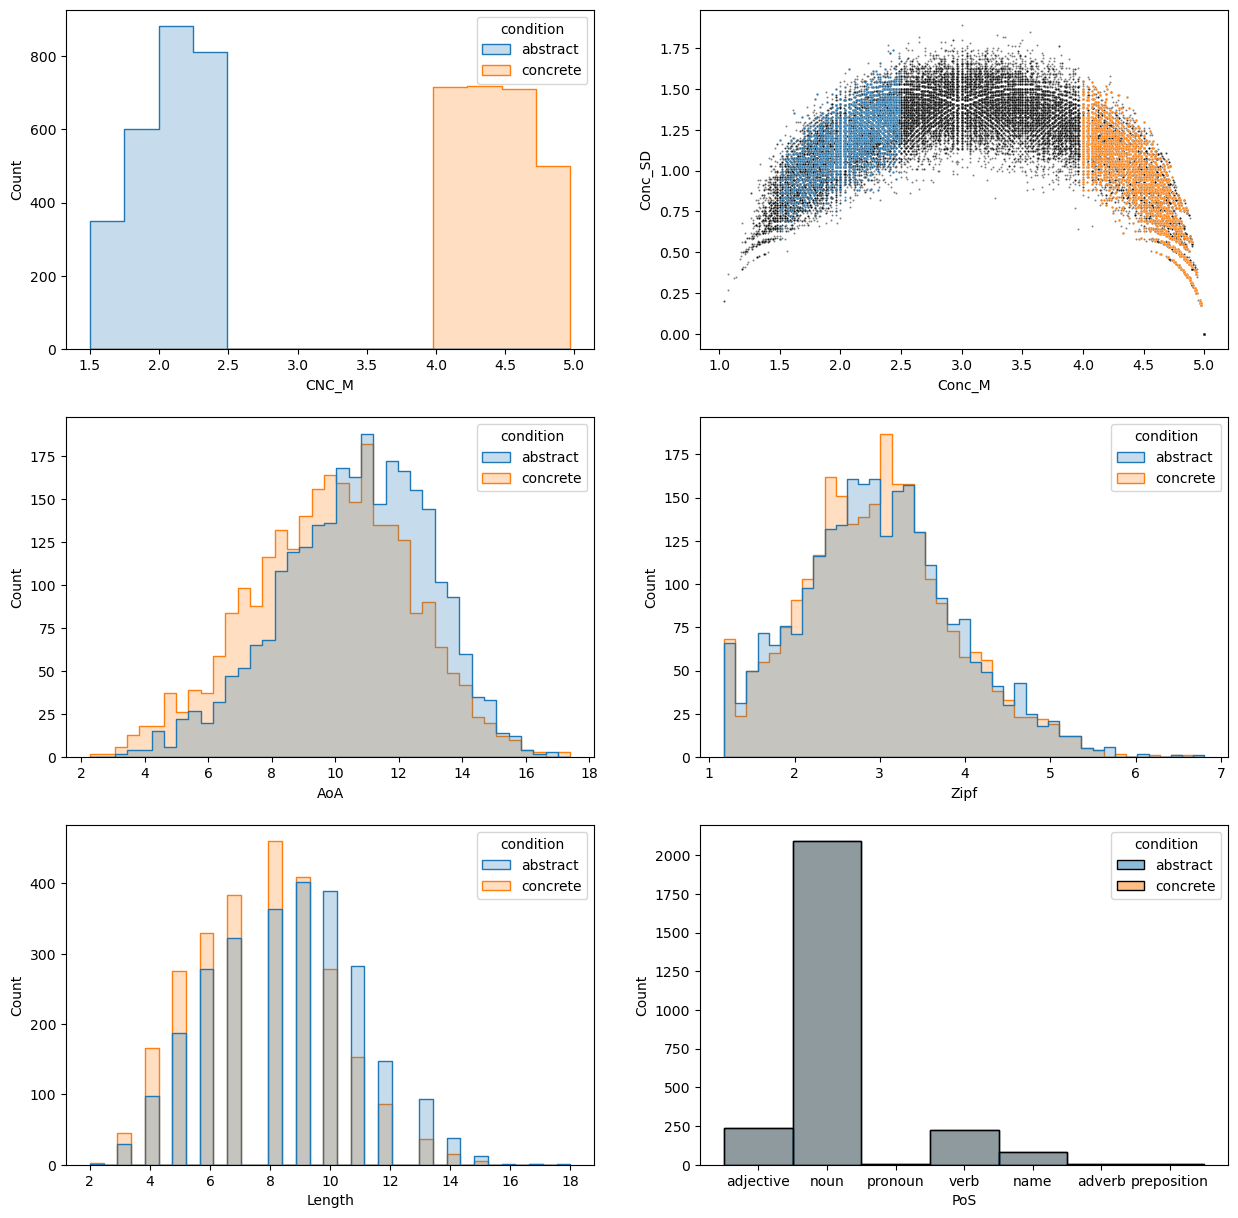

In [39]:
f, ax = plt.subplots(3, 2, figsize=(15,15))
sns.set_context(font_scale=2)
# sns.stripplot(x='condition', y='CNC.Brysbaert.M', data=stim_long, s=2, alpha=0.5, ax=ax[0,0], color='r')
sns.histplot(x='CNC_M', hue='condition', data=stim_long, ax=ax[0,0], element='step')
sns.scatterplot(x='Conc_M', y='Conc_SD', data=ratings_all, s=2, alpha=0.5, ax=ax[0,1], color='black')
sns.scatterplot(x='CNC_M', y='CNC_SD', data=stim_long.query('condition == "abstract"'), s=3, alpha=0.7, ax=ax[0,1], color=(0.12156862745098039, 0.4666666666666667, 0.7058823529411765)
)
sns.scatterplot(x='CNC_M', y='CNC_SD', data=stim_long.query('condition == "concrete"'), s=3, alpha=1, ax=ax[0,1], color=(1.0, 0.4980392156862745, 0.054901960784313725)
)
sns.histplot(x='AoA', hue='condition', data=stim_long, ax=ax[1,0], element='step')
sns.histplot(x='Zipf', hue='condition', data=stim_long, ax=ax[1,1], element='step')
sns.histplot(x='Length', hue='condition', data=stim_long, ax=ax[2,0], element='step')
sns.histplot(x='PoS', hue='condition', data=stim_long, ax=ax[2,1])
fig.suptitle('Psycholinguistic properties of {} concrete-abstract word pairs'.format(int(len(stim_long)/2)), fontsize=16)

## Subselecting nouns

First change the format of the dataframe such that abstract and concrete words go side by side to help subsetting whilst preserving the matching of psycholinguistic properties.

In [6]:
# select concrete and rename columns
words_concrete = stim_long.query("(condition=='concrete')").reset_index(drop=True) # select concrete only
new_col_name = [c+'_concrete' for c in words_concrete.columns.tolist()]
old_col_name = words_concrete.columns.tolist()
words_concrete.rename(columns=dict(zip(old_col_name, new_col_name)), inplace=True)

# select abstract and rename columns
words_abstract = stim_long.query("(condition=='abstract')").reset_index(drop=True) # select abstract only
new_col_name = [c+'_abstract' for c in words_abstract.columns.tolist()]
old_col_name = words_abstract.columns.tolist()
words_abstract.rename(columns=dict(zip(old_col_name, new_col_name)), inplace=True)

# put pairs of concrete and abstract side by side for further subselecting whilst preserving matching
words = pd.concat([words_concrete,words_abstract], axis=1)
words

,word_concrete,item_nr_concrete,condition_concrete,Zipf_concrete,PoS_concrete,Length_concrete,AoA_concrete,CNC_M_concrete,CNC_SD_concrete,word_abstract,item_nr_abstract,condition_abstract,Zipf_abstract,PoS_abstract,Length_abstract,AoA_abstract,CNC_M_abstract,CNC_SD_abstract
0,marine,1,concrete,4.196932,adjective,6,9.80,4.25,1.11,superb,1,abstract,4.383176,adjective,6,10.00,1.62,1.05
1,gingivitis,2,concrete,1.774917,noun,10,12.33,4.03,1.25,coefficient,2,abstract,1.951008,noun,11,13.42,1.85,1.08
2,sugarcane,3,concrete,1.737128,noun,9,7.63,4.89,0.32,unkindness,3,abstract,1.809679,noun,10,7.68,1.96,1.34
3,costume,4,concrete,4.171842,noun,7,4.17,4.57,0.86,anger,4,abstract,4.303727,noun,5,6.00,2.41,1.32
4,pirate,5,concrete,4.088081,noun,6,6.50,4.64,0.78,relation,5,abstract,4.276319,noun,8,8.11,2.11,1.23
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2640,committee,2641,concrete,4.768941,noun,9,9.83,4.14,0.99,generation,2641,abstract,4.700787,noun,10,9.52,1.96,1.07
2641,douche,2642,concrete,2.495076,noun,6,13.39,4.13,1.31,eminence,2642,abstract,2.645126,noun,8,14.59,1.95,0.95
2642,fingerprint,2643,concrete,3.210283,noun,11,7.56,4.96,0.20,disappearance,2643,abstract,3.415895,noun,13,9.00,2.40,1.38
2643,fragment,2644,concrete,3.272077,noun,8,11.53,4.10,1.01,liberation,2644,abstract,3.507311,noun,10,13.45,2.21,1.35


Select our target words, which are nouns and have length of 7 letters or fewer.

In [15]:
nouns = words.query("(PoS_concrete=='noun') and (Length_concrete<=7) and (Length_abstract<=7)")
nouns.reset_index(drop=True, inplace=True)
nouns.to_csv(os.path.join(dir, 'nouns_{}.csv'.format(date.today())))
nouns

,word_concrete,item_nr_concrete,condition_concrete,Zipf_concrete,PoS_concrete,Length_concrete,AoA_concrete,CNC_M_concrete,CNC_SD_concrete,word_abstract,item_nr_abstract,condition_abstract,Zipf_abstract,PoS_abstract,Length_abstract,AoA_abstract,CNC_M_abstract,CNC_SD_abstract
0,costume,4,concrete,4.171842,noun,7,4.17,4.57,0.86,anger,4,abstract,4.303727,noun,5,6.00,2.41,1.32
1,crystal,9,concrete,4.162752,noun,7,7.78,4.58,0.81,minimum,9,abstract,4.388495,noun,7,8.11,2.25,1.40
2,pedal,11,concrete,3.634756,noun,5,6.50,4.44,0.97,anxiety,11,abstract,3.899584,noun,7,8.17,2.21,1.03
3,rook,13,concrete,2.888860,noun,4,11.59,4.38,1.10,gist,13,abstract,2.974489,noun,4,11.30,1.81,1.02
4,mink,14,concrete,3.128705,noun,4,10.32,4.58,0.99,misuse,14,abstract,3.281196,noun,6,9.68,2.07,1.17
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
503,condor,2572,concrete,2.897133,noun,6,13.57,4.46,1.17,decorum,2572,abstract,2.767618,noun,7,15.12,2.36,1.50
504,home,2582,concrete,5.861194,noun,4,3.87,4.11,1.25,way,2582,abstract,6.118429,noun,3,5.39,2.34,1.37
505,bosom,2598,concrete,3.095409,noun,5,12.50,4.63,0.69,macabre,2598,abstract,2.981293,noun,7,14.50,2.25,1.39
506,bank,2625,concrete,5.280146,noun,4,6.44,4.78,0.61,moment,2625,abstract,5.574384,noun,6,7.95,1.61,1.10


Some nouns are not the most appropriate for a cognitive neuroscience experiment (based on intuitive judgement). Some nouns are mostly used in North America and might not be the most familiar to native speakers from our participant pool, who are more likely to be native British English speakers. As a quick diagnostic, we also check whether the nouns go well with the adjective `fake` (e.g., `fake nay`). So, I subselected them, along with their pair (to keep the psycholinguistic property matching), out by hand using Excel and keep a record of them here. 

In [28]:
nouns_removed = pd.read_csv(os.path.join(dir, 'nouns_2023-03-01.csv'), index_col=False)
nouns_removed[nouns_removed['exclude?'].notnull()][['word_concrete','word_abstract']].values.tolist()

[['hooch', 'guile'],
 ['redhead', 'bummer'],
 ['comma', 'recount'],
 ['comet', 'bonkers'],
 ['copier', 'putdown'],
 ['fowl', 'whammy'],
 ['aircrew', 'upsides'],
 ['vulva', 'scruple'],
 ['busload', 'overuse'],
 ['spades', 'whatnot'],
 ['egg', 'yours'],
 ['drapery', 'doting'],
 ['cowhide', 'asinine'],
 ['gypsy', 'wrath'],
 ['spa', 'micro'],
 ['gavel', 'bland'],
 ['ricotta', 'abreast'],
 ['hemp', 'snub'],
 ['oboe', 'spunk'],
 ['pea', 'boo'],
 ['ribcage', 'humbug'],
 ['cunt', 'innate'],
 ['sunroom', 'senile'],
 ['gallop', 'vibes'],
 ['braid', 'twerp'],
 ['chalice', 'pronto'],
 ['rodeo', 'nay'],
 ['fillet', 'macro'],
 ['cleft', 'obtuse'],
 ['pucker', 'wacko'],
 ['world', 'nothing'],
 ['soy', 'circa'],
 ['rosary', 'witchy'],
 ['cloak', 'sane'],
 ['rind', 'glum'],
 ['tartar', nan],
 ['smock', 'meanie'],
 ['gateway', 'ultra'],
 ['carbon', 'epic'],
 ['petrol', 'daft'],
 ['yarn', 'poof'],
 ['carp', 'vulgar'],
 ['vendor', 'legit'],
 ['gull', 'amends'],
 ['hash', 'homing'],
 ['ember', 'screwy'],
 

In [33]:
# remove the unsuitable words
nouns = nouns[nouns_removed['exclude?'].isnull()]

# now turn df back into long form
nouns_concrete = nouns[words_concrete.columns].reset_index(drop=True) # rename columns
nouns_abstract = nouns[words_abstract.columns].reset_index(drop=True) # rename columns
nouns_concrete.rename(columns=dict(zip(nouns_concrete.columns.tolist(), stim_long.columns)), inplace=True) # change to common column names
nouns_abstract.rename(columns=dict(zip(nouns_abstract.columns.tolist(), stim_long.columns)), inplace=True) # change to common column names
nouns_long = pd.concat([nouns_concrete,nouns_abstract], axis=0).reset_index(drop=True)
nouns_long.to_csv(os.path.join(dir, 'nouns_cleaned_{}.csv'.format(date.today())), index=False)
nouns_long

C:\Users\rl05\AppData\Local\Temp\ipykernel_1232\3358589265.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  nouns = nouns[nouns_removed['exclude?'].isnull()]


,word,item_nr,condition,Zipf,PoS,Length,AoA,CNC_M,CNC_SD
0,costume,4,concrete,4.171842,noun,7,4.17,4.57,0.86
1,crystal,9,concrete,4.162752,noun,7,7.78,4.58,0.81
2,pedal,11,concrete,3.634756,noun,5,6.50,4.44,0.97
3,rook,13,concrete,2.888860,noun,4,11.59,4.38,1.10
4,mink,14,concrete,3.128705,noun,4,10.32,4.58,0.99
...,...,...,...,...,...,...,...,...,...
839,anarchy,2548,abstract,3.155128,noun,7,13.94,2.12,1.31
840,jilt,2568,abstract,1.598826,noun,4,12.28,2.00,1.15
841,decorum,2572,abstract,2.767618,noun,7,15.12,2.36,1.50
842,way,2582,abstract,6.118429,noun,3,5.39,2.34,1.37


## Visualise subselected nouns

Text(0.5, 0.98, 'Psycholinguistic properties of 422 concrete-abstract word pairs')

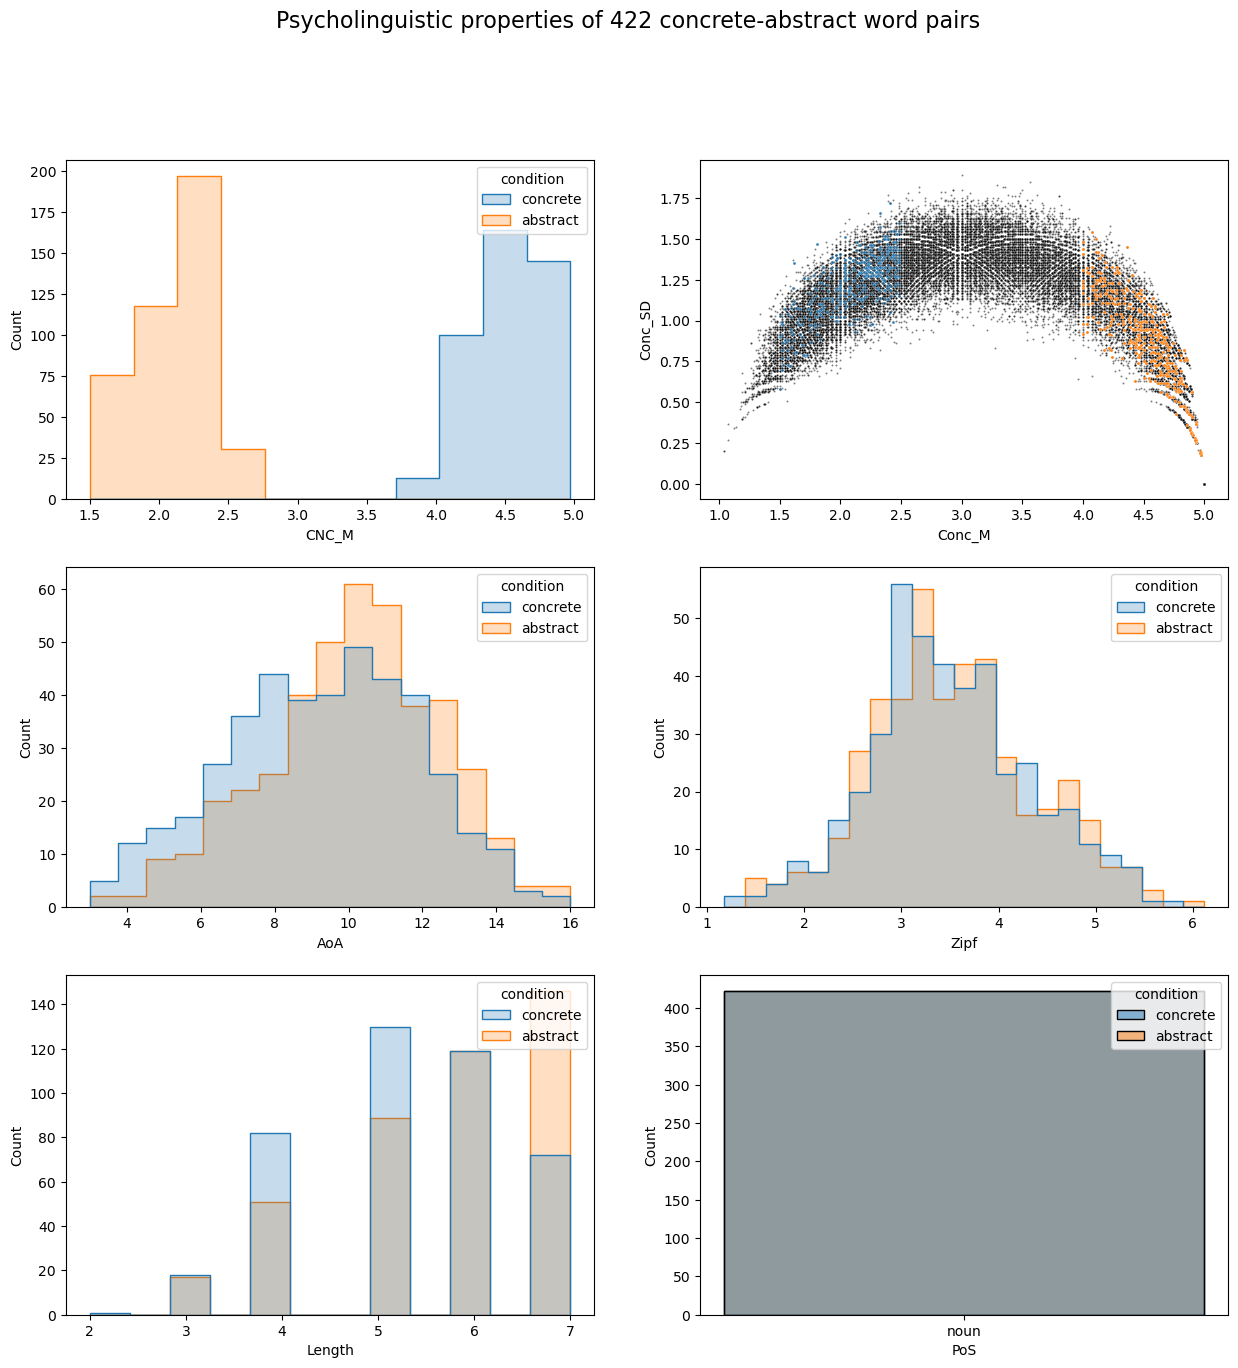

In [40]:
f, ax = plt.subplots(3, 2, figsize=(15,15))
sns.set_context(font_scale=2)
sns.histplot(x='CNC_M', hue='condition', data=nouns_long, ax=ax[0,0], element='step')
sns.scatterplot(x='Conc_M', y='Conc_SD', data=ratings_all, s=2, alpha=0.5, ax=ax[0,1], color='black')
sns.scatterplot(x='CNC_M', y='CNC_SD', data=nouns_long.query('condition == "abstract"'), s=5, alpha=0.7, ax=ax[0,1], color=(0.12156862745098039, 0.4666666666666667, 0.7058823529411765)
)
sns.scatterplot(x='CNC_M', y='CNC_SD', data=nouns_long.query('condition == "concrete"'), s=5, alpha=1, ax=ax[0,1], color=(1.0, 0.4980392156862745, 0.054901960784313725)
)
sns.histplot(x='AoA', hue='condition', data=nouns_long, ax=ax[1,0], element='step')
sns.histplot(x='Zipf', hue='condition', data=nouns_long, ax=ax[1,1], element='step')
sns.histplot(x='Length', hue='condition', data=nouns_long, ax=ax[2,0], element='step')
sns.histplot(x='PoS', hue='condition', data=nouns_long, ax=ax[2,1])
f.suptitle('Psycholinguistic properties of {} concrete-abstract word pairs'.format(int(len(nouns_long)/2)), fontsize=16)

Visualising concreteness mean and standard deviation and how our selection falls within it

[Text(0.5, 0, ''), Text(0, 0.5, '')]

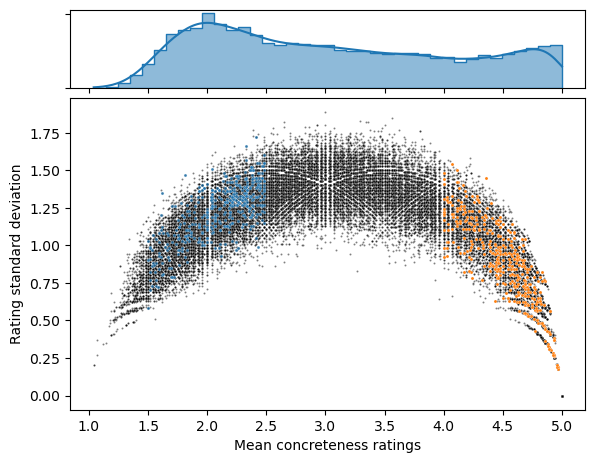

In [35]:
# Start with a square Figure.
fig = plt.figure(figsize=(8.25, 5))
# Add a gridspec with two rows and two columns and a ratio of 1 to 4 between
# the size of the marginal axes and the main axes in both directions.
# Also adjust the subplot parameters for a square plot.
gs = fig.add_gridspec(2, 2,  width_ratios=(4, 1), height_ratios=(1, 4),
                      left=0.1, right=0.9, bottom=0.1, top=0.9,
                      wspace=0.05, hspace=0.05)
# Create the Axes.
ax = fig.add_subplot(gs[1, 0])
ax_histx = fig.add_subplot(gs[0, 0], sharex=ax)
ax.set(xlabel="Mean concreteness ratings", ylabel="Rating standard deviation")
# Draw the scatter plot and marginals.
sns.scatterplot(x='Conc_M', y='Conc_SD', data=ratings_all, s=2, alpha=0.5, ax=ax, color='black')
sns.scatterplot(x='CNC_M', y='CNC_SD', data=nouns_long.query('condition == "abstract"'), s=5, alpha=0.7, ax=ax, color=(0.12156862745098039, 0.4666666666666667, 0.7058823529411765)
)
sns.scatterplot(x='CNC_M', y='CNC_SD', data=nouns_long.query('condition == "concrete"'), s=5, alpha=1, ax=ax, color=(1.0, 0.4980392156862745, 0.054901960784313725)
)
sns.histplot(x='Conc_M', data=ratings_all, ax=ax_histx, element='step', kde=True)
ax_histx.tick_params(axis='both', labelbottom=False, labelleft=False)
ax_histx.set(xlabel='',ylabel='')